In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
dff = pd.read_csv('kaggle_survey_2020_responses.csv')
dff.head()

<ipython-input-49-4060dc3ca42b>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dff = pd.read_csv('kaggle_survey_2020_responses.csv')


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After Importing the Data Set, the next step is to clean and prepare the data for Analysis.
After observing the imported data, it was inferred that the first column and second row has no utility in terms of data analysis. So they are removed from the data set.

In [50]:
#dropped the first column and second row
dff = dff.drop(['Time from Start to Finish (seconds)'],axis =1)
dff = dff.drop(0,axis=0)
dff.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Further Cleaning process of the data set. 
Data consisted of multiple columns that links to multiple answer questions.
These columns were identified and merged and a new Database was formed with a proper response set.

In [51]:
#I made a list of questions that have multiple answers as response  
#so as to concatenate them under one column
que_list=[["Q7",13],["Q9",12],["Q10",13],["Q12",3],["Q14",12],["Q16",16],["Q17",12],["Q18",7],["Q19",6],["Q23",7],["Q26_A",12],["Q26_B",12],["Q27_A",12],["Q27_B",12],["Q28_A",11],["Q28_B",11],["Q29_A",18],["Q29_B",18],["Q31_A",11],["Q31_B",11],["Q33_A",8],["Q33_B",8],["Q34_A",12],["Q34_B",12],["Q35_A",11],["Q35_B",11],["Q36",10],["Q37",12],["Q39",12]]

#making a list of columns to concatenate into one column
def col_list(arr):
    ret_list = [arr[0]+"_OTHER"]
    val=""
    for i in range(1,arr[1]):
        val=str(arr[0])+"_Part_"+str(i)
        ret_list.append(val)
    return ret_list

#cleanup step
for arr in que_list:
    cols = col_list(arr)
    dff[arr[0]]= [[e for e in row if e==e] for row in dff[cols].values.tolist()]
    #dff[arr[0]]=dff[cols].fillna('').sum(axis=1)   #Alternate approach | might consider later
#importing question list so that i can transfer the cleaned data into a new DF
q_list = pd.read_csv('Q_List.csv')
columns = list(q_list['Q.No.'])

#making a new Dataframe with cleanedup data
df = dff[columns]
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q38,Q39,Q26_B,Q27_B,Q28_B,Q29_B,Q31_B,Q33_B,Q34_B,Q35_B
1,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,"[Other, Python, R, SQL, C, Javascript, MATLAB]",Python,"[Jupyter (JupyterLab, Jupyter Notebooks, etc) ...","[ Kaggle Notebooks, Colab Notebooks]",...,"Basic statistical software (Microsoft Excel, G...","[Kaggle (notebooks, forums, etc), Journal Publ...","[ Amazon Web Services (AWS) , Microsoft Azure...","[ Azure Cloud Services , Microsoft Azure Cont...","[ Amazon SageMaker , Amazon Forecast , Amazo...","[MongoDB , Microsoft SQL Server , Google Cloud...","[Microsoft Power BI, Amazon QuickSight, Google...","[Automated data augmentation (e.g. imgaug, alb...","[ Google Cloud AutoML , Databricks AutoML , ...",[ TensorBoard ]
2,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,"[Python, R, SQL]",Python,"[Visual Studio, PyCharm , Sublime Text ]",[Colab Notebooks],...,"Business intelligence software (Salesforce, Ta...","[Twitter (data science influencers), Reddit (r...",[],[],[],[],[],[],[],[]
3,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,"[Java, Javascript, Bash]",R,"[Visual Studio Code (VSCode), Notepad++ , ...",[],...,"Basic statistical software (Microsoft Excel, G...","[Email newsletters (Data Elixir, O'Reilly Data...",[None],[],[],"[MySQL , Microsoft SQL Server ]",[],[None],[],[None]
4,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,"[Python, SQL, Bash]",Python,[ PyCharm ],[],...,"Local development environments (RStudio, Jupyt...",[None],[],[],[],[],[],[],[],[]
5,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,[Python],Python,[],[],...,NaN,[],[],[],[],[],[],[],[],[]


In [52]:
def value_cnt_fn(arr):
    nested_data = []
    for d in arr:
        if len(d)!=0:
            nested_data=nested_data+d
    temp_series = pd.Series(nested_data).value_counts()
    #temp_df = pd.DataFrame({'values':temp_series.index,'count':temp_series.values})
    return temp_series


Q1) Most Used Programming Language By Different Professionals?

In [53]:
#Finding Out The Unique Values in the column, eliminating NaN values
prof_list=[e for e in list(df['Q5'].unique()) if e==e]
Pref_lang = []

#mapping out the most used language based on max occurence
for i in prof_list:
    df1=df[df['Q5']==i]
    df2=value_cnt_fn(df1['Q7']).idxmax()
    Pref_lang.append(df2)
#Final step is to convert the obtained data into a dataframe
df3 = pd.DataFrame({'Profession':prof_list,'Used Language':Pref_lang})
display(df3)

,Profession,Used Language
0,Student,Python
1,Data Engineer,Python
2,Software Engineer,Python
3,Data Scientist,Python
4,Data Analyst,Python
5,Research Scientist,Python
6,Other,Python
7,Currently not employed,Python
8,Statistician,R
9,Product/Project Manager,Python


Q2) Highest Experience in Coding & Most Preferred Programming Language By Them?

In [54]:
display(list(df['Q6'].unique()))

['5-10 years',
 '10-20 years',
 '3-5 years',
 '< 1 years',
 '1-2 years',
 '20+ years',
 'I have never written code',
 nan]

In [55]:
#maximum experience given in the DB is 20+years
df1 = df[df['Q6']=='20+ years']
df2 = pd.Series(df1.groupby('Q8')['Q8'].count())
display(df2.idxmax())


'Python'

Q3) Any Correlation Between Size of Company and ML Application?

In [56]:
#getting all the ml_application options for the question asked
ml_app = list(df['Q22'].dropna().unique())

#remove the options that indicate ML application is not present in the company
ml_app.remove('I do not know')
ml_app.remove('No (we do not use ML methods)')
print(ml_app)

['We have well established ML methods (i.e., models in production for more than 2 years)', 'We use ML methods for generating insights (but do not put working models into production)', 'We are exploring ML methods (and may one day put a model into production)', 'We recently started using ML methods (i.e., models in production for less than 2 years)']


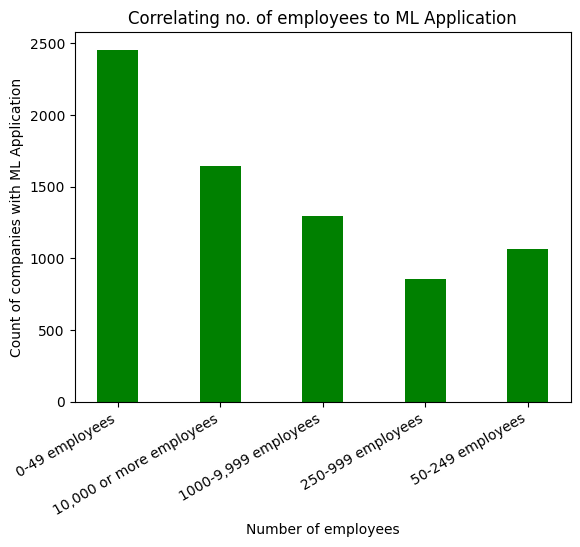

In [57]:
#setting up the dataframe that has values indicating ML application in companies
df1 = df[df['Q22'].isin(ml_app)]
df2 = df1.groupby(['Q20'])['Q20'].count()
ind = list(df2.index)
values = list(df2)

#plotting the bar graph
plt.bar(ind, values, color ='green',
        width = 0.4)
 
plt.xlabel("Number of employees")
plt.ylabel("Count of companies with ML Application")
plt.title("Correlating no. of employees to ML Application")

#the sub-code that aligns the x-axis labels so that it is visible
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

Q4) From which platform are Students Studying Data Science the most ?

In [58]:
#filtering data for students
df1 = df[df['Q5']=='Student']

#new dataframe with count of platform
df2 = pd.DataFrame({'Platform':value_cnt_fn(df1['Q37']).index, 'Count':value_cnt_fn(df1['Q37']).values})
df2 = df2[df2.Platform != 'None']
display(df2[df2.Count == df2.Count.max()])

,Platform,Count
0,Coursera,1641


Q5) Most Used ML Experiment Tools Based on YEars of Experience?

In [59]:
#Finding Out The Unique Values in the column, eliminating NaN values
#df.groupby(['Q15','Q30'])['Q30'].count()
arr_list=df['Q15'].dropna().unique()
Used_ML=[]

for i in arr_list:
    df1 = df[df['Q15']==i]
    Used_ML.append(df1.groupby('Q30')['Q30'].count().idxmax())

df2 = pd.DataFrame({'ML Experience':arr_list, 'Preferred ML':Used_ML})
display(df2)

,ML Experience,Preferred ML
0,1-2 years,MySQL
1,I do not use machine learning methods,MySQL
2,3-4 years,MySQL
3,Under 1 year,MySQL
4,2-3 years,MySQL
5,4-5 years,PostgresSQL
6,5-10 years,PostgresSQL
7,20 or more years,PostgresSQL
8,10-20 years,PostgresSQL


Q6) Primary Tool Used To Analyse Data: Visual Representation

Text(0.5, 1.0, 'Primary Tool Used To Analyse Data')

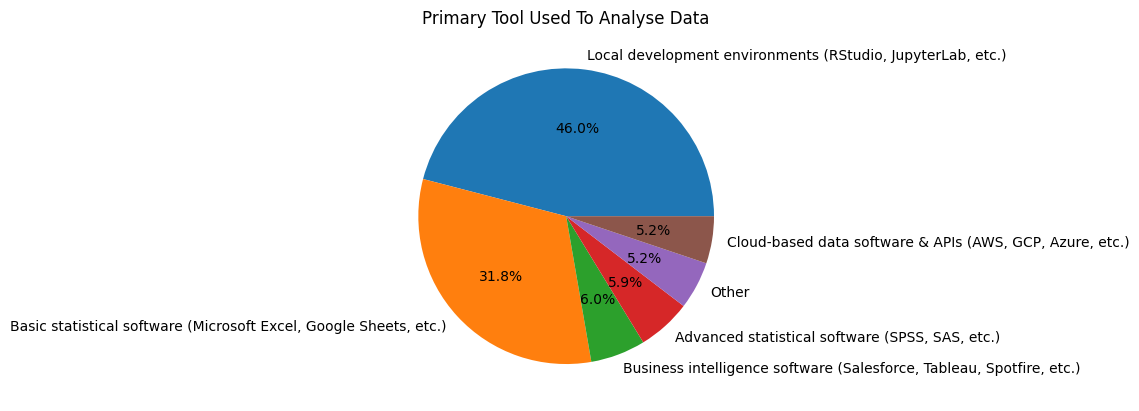

In [60]:
df2=df['Q38'].value_counts()
plt.pie(df2,labels=df2.index,autopct='%1.1f%%')
plt.title("Primary Tool Used To Analyse Data")


Q7) Does Education Affect the Salary of a Person?

In [61]:
#first step was to extract the education, salary, and the count of values corresponding to them
edu=[]
sal=[]
df1 = df.groupby(['Q4','Q24'])['Q4'].count()
val = df1.values
for ind in df1.index:
    edu.append(ind[0])
    sal.append(ind[1])
    

In [62]:
#the next step involves finding the average of range data
tm_df = pd.DataFrame({'Range':sal,'Frequency':val})

#since salary is given as range, need to categorize it as minimum and maximum value
tm_df[['min','max']] = tm_df.Range.str.split("-",expand=True)

#last value not having a max range. so max value set as the min value
maxx = tm_df['min'].max()
tm_df['max']=tm_df['max'].replace(np.nan,maxx)

#some values having $ sign and > sign
#so these chars need to removed and values to be converted from text to string
tm_df[tm_df.columns[1:]] = tm_df[tm_df.columns[1:]].replace('[\$>,]', '', regex=True).astype(int)

#finding the midpoint as average of min and max values
tm_df['mid_pt']=(tm_df['min']+tm_df['max'])/2
tm_df['Education']=edu
tm_df


,Range,Frequency,min,max,mid_pt,Education
0,$0-999,781,0,999,499.5,Bachelor’s degree
1,"1,000-1,999",171,1000,1999,1499.5,Bachelor’s degree
2,"10,000-14,999",198,10000,14999,12499.5,Bachelor’s degree
3,"100,000-124,999",106,100000,124999,112499.5,Bachelor’s degree
4,"125,000-149,999",62,125000,149999,137499.5,Bachelor’s degree
...,...,...,...,...,...,...
162,"60,000-69,999",10,60000,69999,64999.5,Some college/university study without earning ...
163,"7,500-9,999",9,7500,9999,8749.5,Some college/university study without earning ...
164,"70,000-79,999",14,70000,79999,74999.5,Some college/university study without earning ...
165,"80,000-89,999",6,80000,89999,84999.5,Some college/university study without earning ...


In [63]:
qualification = [e for e in tm_df['Education'].unique()]
salary = []

#avg. of range data is sum of cumulative f / sum of f
tm_df['cumul']=tm_df['Frequency']*tm_df['mid_pt']

#calculating avg. and appending it to salary list
for i in qualification:
    df5 = tm_df[i== tm_df['Education']]
    sum_fre = df5['Frequency'].sum()
    sum_cum = df5['cumul'].sum()
    avg = sum_cum/sum_fre
    salary.append(avg)

print(qualification)
print(salary)

['Bachelor’s degree', 'Doctoral degree', 'I prefer not to answer', 'Master’s degree', 'No formal education past high school', 'Professional degree', 'Some college/university study without earning a bachelor’s degree']
[32511.036840358447, 63042.72933643772, 27467.863924050635, 47458.25568764091, 28867.424528301886, 38009.61063829787, 36830.02337662338]


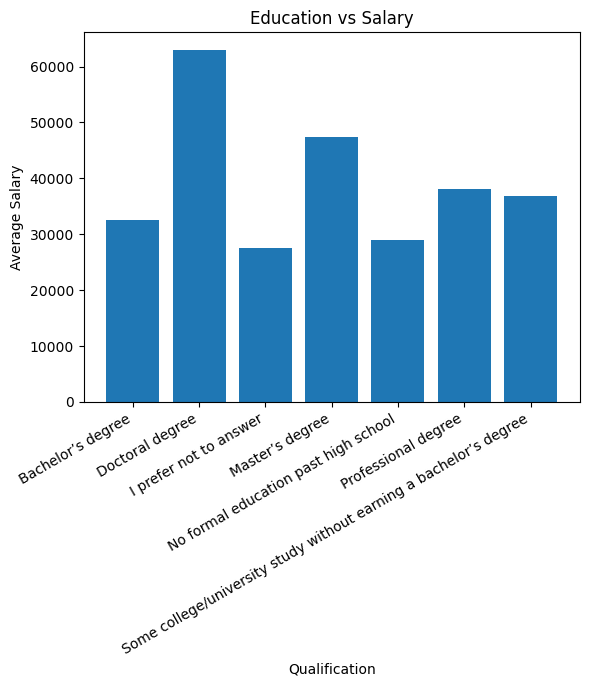

In [64]:
#plotting step
plt.bar(qualification,salary)
plt.xlabel("Qualification")
plt.ylabel("Average Salary")
plt.title("Education vs Salary")
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()


Q8) Average ML Experience in Each Job Role  5,15

In [92]:
#extracting the unique values in job and ml experience
job = [e for e in df['Q5'].dropna().unique()]
exp = [e for e in df['Q15'].dropna().unique()]
print(job)
print(exp)

['Student', 'Data Engineer', 'Software Engineer', 'Data Scientist', 'Data Analyst', 'Research Scientist', 'Other', 'Currently not employed', 'Statistician', 'Product/Project Manager', 'Machine Learning Engineer', 'Business Analyst', 'DBA/Database Engineer']
['1-2 years', 'I do not use machine learning methods', '3-4 years', 'Under 1 year', '2-3 years', '4-5 years', '5-10 years', '20 or more years', '10-20 years']


In [93]:
#creating a new db for ease of calculation
df1 = df[['Q5','Q15']]
df1 = df1.dropna()

#replacing the years range with median value of the range for easy calculation
exp_rep = [1.5,0,3.5,1,2.5,4.5,7.5,20,15]
df1['Q15']=df1['Q15'].replace(exp,exp_rep)
df2 = df1.groupby(['Q5','Q15'])['Q5'].count()
Q5 = [e[0] for e in df2.index]
Q15 = [e[1] for e in df2.index]
val = [e for e in df2.values]
df2

Q5                Q15 
Business Analyst  0.0     112
                  1.0     250
                  1.5     143
                  2.5      58
                  3.5      25
                         ... 
Student           3.5      46
                  4.5      38
                  7.5      16
                  15.0      1
                  20.0      2
Name: Q5, Length: 115, dtype: int64

In [98]:
#next step  involves calculating mean of grouped data
df3 = pd.DataFrame({"Job":Q5,"ML":Q15,"F":val})

#two scenarios: one where no ML experience is included & one where its not. both yield different o/p
df3 = df3[df3['ML']!=0.0]

#calculating cumulative frequency
df3['cf'] = df3['ML']*df3['F']

ML_exp = []
for i in job:
    df5 = df3[i== df3['Job']]
    sum_fre = df5['F'].sum()
    sum_cum = df5['cf'].sum()
    avg = sum_cum/sum_fre
    ML_exp.append(int(avg))

df4 = pd.DataFrame({"Job":job,"Avg.ML Experience":ML_exp})
df4


,Job,Avg.ML Experience
0,Student,1
1,Data Engineer,2
2,Software Engineer,2
3,Data Scientist,3
4,Data Analyst,1
5,Research Scientist,4
6,Other,2
7,Currently not employed,1
8,Statistician,3
9,Product/Project Manager,2


Q9) What are the Most Used Learning Platform for Data Science?

Text(0.5, 1.0, 'Most Used Data Science Learning Platform')

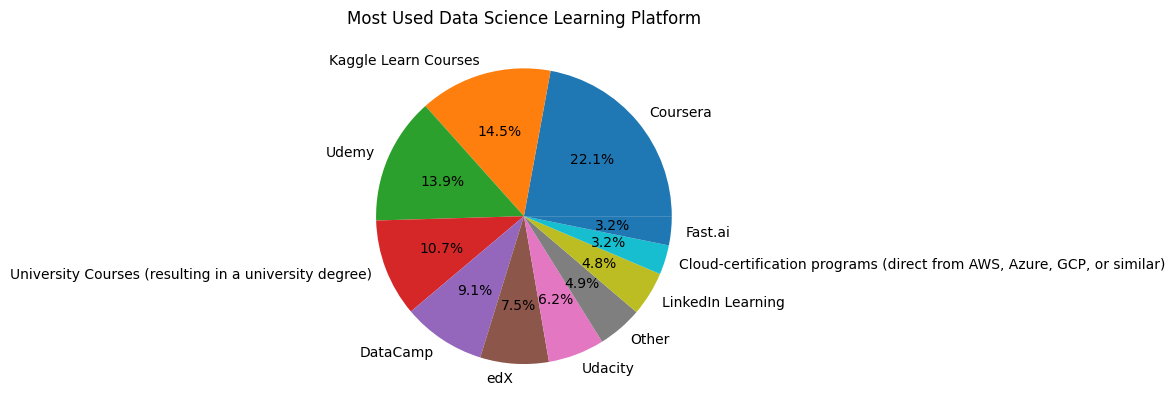

In [67]:
df2=value_cnt_fn(df['Q37']).drop('None')
plt.pie(df2,labels=df2.index,autopct='%1.1f%%')
plt.title("Most Used Data Science Learning Platform")

Q10) Highest Level of Education Based on Gender

In [68]:
#dff = df[['Q2','Q4']].dropna()
df1 = df.groupby(['Q2','Q4'])['Q4'].count()
edu = sorted([e for e in df['Q4'].dropna().unique()]) #this will be the index of the Dataframe
gender = [e for e in df['Q2'].unique()] #this will be the keys
edu_in = []
gen_in = []
cnt = []
for ind in df1.index:
    edu_in.append(ind[1])
    gen_in.append(ind[0])
print(edu)

['Bachelor’s degree', 'Doctoral degree', 'I prefer not to answer', 'Master’s degree', 'No formal education past high school', 'Professional degree', 'Some college/university study without earning a bachelor’s degree']


In [69]:
df2 = pd.DataFrame({'edu':edu_in,'gender':gen_in, 'values':df1.values})
df2

,edu,gender,values
0,Bachelor’s degree,Man,5596
1,Doctoral degree,Man,1765
2,I prefer not to answer,Man,281
3,Master’s degree,Man,6125
4,No formal education past high school,Man,218
5,Professional degree,Man,563
6,Some college/university study without earning ...,Man,898
7,Bachelor’s degree,Nonbinary,16
8,Doctoral degree,Nonbinary,6
9,I prefer not to answer,Nonbinary,4


In [70]:
t_dict={}
for i in gender:
    df3 = df2[df2['gender']==i]
    for j in edu:
        if j not in list(df3['edu']):
            df3.loc[len(df3.index)]= [j,i,0]
    df3.sort_values(by=['edu'])
    cnt = [e for e in df3['values']]
    t_dict.update({i:cnt})
    cnt = []

print(t_dict)

<ipython-input-70-bb125bca5d72>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[len(df3.index)]= [j,i,0]


{'Man': [5596, 1765, 281, 6125, 218, 563, 898], 'Woman': [1282, 488, 73, 1608, 14, 128, 171], 'Prefer to self-describe': [16, 6, 6, 18, 2, 3, 2], 'Prefer not to say': [68, 37, 35, 89, 6, 4, 17], 'Nonbinary': [16, 6, 4, 19, 1, 4, 0]}


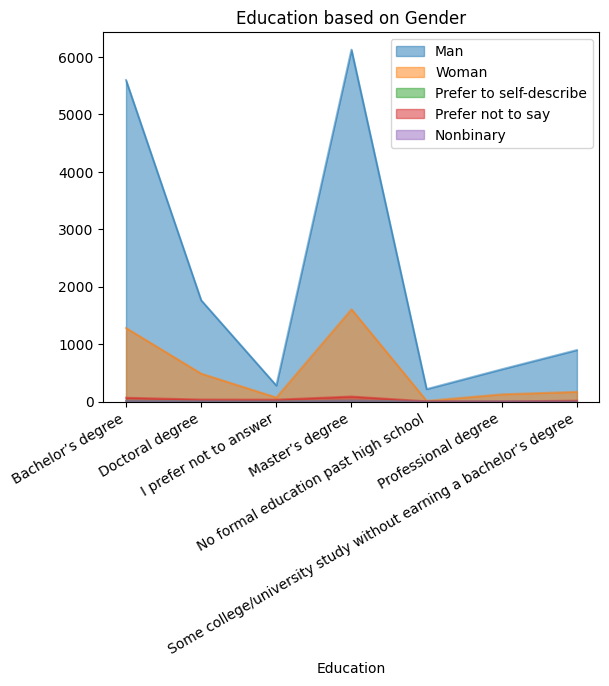

In [71]:
df3 = pd.DataFrame(t_dict,index=edu)
axe = df3.plot.area(stacked=False)
plt.xlabel("Education")
plt.title("Education based on Gender")
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()